# Reviews   :  300
# Sentences :  1232
# Texts :  1232
# Opinions  :  1535
# Categories:  12


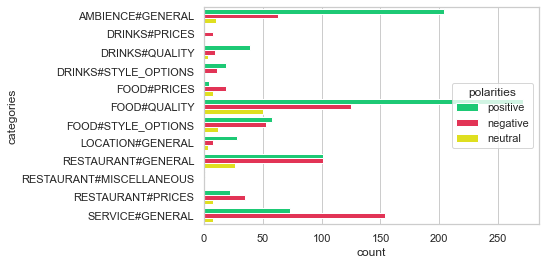

In [1]:
from collections import Counter

from jinja2 import Template
from lxml import etree as ET
from os.path import join
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

tree = ET.parse(join("reviews.xml"))
root = tree.getroot()

reviews = root.findall("Review")
sentences = root.findall("**/sentence")
print("# Reviews   : ", len(reviews))
print("# Sentences : ", len(sentences))

texts = []

for sentence in sentences:
    text = sentence.find('text').text
    texts.append(text)
    
print("# Texts : ", len(texts))
    
opinions = root.findall("**/**/Opinion")
categories = [opinion.attrib["category"] for opinion in opinions]
polarities = [opinion.attrib["polarity"] for opinion in opinions]
print("# Opinions  : ", len(opinions))
df = pd.DataFrame({"categories": categories, "polarities": polarities}).sort_values("categories")
categories = Counter(df.categories)
print("# Categories: ", len(categories))

g = sns.countplot(y="categories", hue="polarities", data=df,
                  palette={"neutral": "yellow", "negative": "#FF1744", "positive": "#00E676"})

In [2]:
data = pd.DataFrame(texts, columns = ['text'])
data

,text
0,Manzara sahane evet ama servis rezalet.
1,"Soguk su isteyince, soguk yok, butun sulari di..."
2,"Yemekler iyi hos, lezzetler iyi ama heyecan ve..."
3,bu servise bu fiyatlar ise cok faZla.
4,Lacivert beni kalitesinin dusukluguyle cok sas...
...,...
1227,Kurufasülye ne kadar değişik olabilir demeyin ...
1228,Tereyağlı pilavları ve tava yoğurdu da çok baş...
1229,Üzerine bal ve fındık dökülmüş sütlaçları çok ...
1230,Ayrıca hergun çıkardıkları farklı zeytinyağlı ...


In [9]:
#xml parser
def get_list(path):
    tree=ET.parse(path)
    root = tree.getroot()
    text_list = []
    opinion_list = []
    for review in root.findall('Reviews'):
        text_string=""
        opinion_inner_list=[]
        for sent in review.findall('./sentences/sentence'):
            text_string= text_string+ " "+ sent.find('text').text
        text_list.append(text_string)
        for opinion in review.findall('./Opinions/Opinion'):
            opinion_dict = {
                opinion.get('category').replace('#','_'): opinion.get('polarity')
            }
            opinion_inner_list.append(opinion_dict)
        opinion_list.append(opinion_inner_list)
    return text_list,opinion_list

In [10]:
#Selecting only 20 most common aspect.
def get_most_common_aspect(opinion_list):
    import nltk
    opinion= []
    for inner_list in opinion_list:
        for _dict in inner_list:
            for key in _dict:
                opinion.append(key)
    most_common_aspect = [k for k,v in nltk.FreqDist(opinion).most_common(20)]
    return most_common_aspect

In [11]:
train_text_list,train_opinion_list = get_list("reviews.xml")
most_common_aspect = get_most_common_aspect(train_opinion_list)

In [12]:
most_common_aspect

[]

In [5]:
"""""def create_exs(filename):
    polarities = []
    aspects = []
    text = []
    ids = []
    tree = ET.parse(filename)
    root = tree.getroot()
    for sentence in root.findall('sentence'):
        ids.append(sentence.attrib['id'])
        words = sentence.find('text').text
        a_terms = sentence.findall('opinion')
        sentiments = []
        terms = []
        froms, tos = [], []
        if a_terms is not None:
            for at in a_terms:
                terms.append(at.attrib['target'])
                if 'polarity' in at.attrib:
                    sentiments.append(at.attrib['polarity'])
                froms.append(int(at.attrib['from']))
                tos.append(int(at.attrib['to']))
        aspects.append(terms)
        indices.append(idxs)
        polarities.append(sentiments)
        text.append(words.strip())
    return {'orig': text,'polarity': polarities, 
            'aspects': aspects, 'id': ids}"""

'""def create_exs(filename):\n    polarities = []\n    aspects = []\n    text = []\n    ids = []\n    tree = ET.parse(filename)\n    root = tree.getroot()\n    for sentence in root.findall(\'sentence\'):\n        ids.append(sentence.attrib[\'id\'])\n        words = sentence.find(\'text\').text\n        a_terms = sentence.findall(\'opinion\')\n        sentiments = []\n        terms = []\n        froms, tos = [], []\n        if a_terms is not None:\n            for at in a_terms:\n                terms.append(at.attrib[\'target\'])\n                if \'polarity\' in at.attrib:\n                    sentiments.append(at.attrib[\'polarity\'])\n                froms.append(int(at.attrib[\'from\']))\n                tos.append(int(at.attrib[\'to\']))\n        aspects.append(terms)\n        indices.append(idxs)\n        polarities.append(sentiments)\n        text.append(words.strip())\n    return {\'orig\': text,\'polarity\': polarities, \n            \'aspects\': aspects, \'id\': ids}'

In [6]:
""""example = create_exs('reviews.xml')
example""""

SyntaxError: EOL while scanning string literal (4060449864.py, line 2)